In [1]:
from transformers import pipeline
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
from transformers import LongformerTokenizer, LongformerForSequenceClassification, EncoderDecoderModel, LongformerConfig, LongformerTokenizerFast
import numpy as np
import matplotlib.pyplot as plt


/Users/jyotit-kaushal/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setting up Dataset

In [4]:
file_path= "../datasets/2022_melbourne_activities.csv"
column_name= "text"

df= pd.read_csv(file_path)

print(len(df))
print(df.columns.values.tolist())

if len(df)>1000:
    tweets_subset = df.head(1000)
    tweets= tweets_subset[column_name].tolist()
else:
    tweets= df[column_name].tolist()

X_train= [str(value) for value in tweets]


4777
['context_annotations', 'lang', 'id', 'geo', 'author_id', 'entities', 'text', 'edit_history_tweet_ids', 'created_at', 'withheld']


## Setting up the Topic Classification Model

In [5]:
topics= ['Walking', 'Fishing', 'Photography', 'Hiking', 'Children', 'Running', 'Badminton', 'Basketball', 'Soccer', 'Swimming', 'Golf', 'Dance']
model = 'MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7'
tokenizer = LongformerTokenizerFast.from_pretrained("allenai/longformer-base-4096", max_length=512, padding=True, truncation=True)
classifier = pipeline(task='zero-shot-classification', model=model, tokenizer=model)

In [6]:
resultingclassification={}
count=0
for s in X_train:
    try:
        c= classifier(s, topics, truncation=True)
        labels= c['labels']
        scores= c['scores']

        max_value_index = scores.index(max(scores))
        label = labels[max_value_index]

        count+=1
        print(count)
        resultingclassification[s]= label
    except Exception as e:
        resultingclassification[s]= np.nan
        continue

# print(resultingclassification)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [78]:
print(resultingclassification)

{'PB golf this morn gets you up. 95 at @yarrabendgolf https://t.co/tTJyRhot0E': 'Golf', "Newly restored facade of the #Prahran Arcade #ChapelSt, one of my favourite buildings that way (peek into #JBHiFi for a glimpse of the interior!). Cycling home from a #LowRez baritones sectional :) @ Dan Murphy's https://t.co/uQ1LxDYS2w": 'Photography', 'Just posted a photo @ Dandenong Basketball https://t.co/DX19Ov0aoN': 'Photography', 'Dominos has closed all its stores in Italy. Nature is healing ❤️': 'Walking', "Folks if you attended #PAXAUS and have any footage at one of the Foyer Games activations (Just Dance, ROCKBANDLAND or Sportsball), and you're happy to share, please do so here 👉👈": 'Photography', '💰 MUST WIN @ CRANBOURNE 💰\n\nR4 - 6 GREECE \n\nJumping from gate will give it the edge and will be running along fresh. Has been forced to freshen up with all the wet tracks but will be horse to watch.\n\n#mustwin | #KTCWIN | #form4u': 'Running', 'Congratulations to #1 Legend Galeai for being s

In [20]:
labels=[]
for key, value in resultingclassification.items():
    try:
        labels.append(value)
    except Exception as e:
        labels.append(np.nan)
        continue
print(labels)

['Walking', 'Soccer', 'Running', 'Running', 'Children', 'Dance', 'Children', 'Children', 'Walking', 'Dance', 'Photography', 'Soccer', 'Running', 'Running', 'Photography', 'Running', 'Photography', 'Photography', 'Running', 'Walking', 'Walking', 'Photography', 'Photography', 'Walking', 'Soccer', 'Badminton', 'Walking', 'Walking', 'Walking', 'Photography', 'Walking', 'Photography', 'Dance', 'Walking', 'Walking', 'Photography', 'Walking', 'Walking', 'Walking', 'Children', 'Running', 'Photography', 'Basketball', 'Dance', 'Photography', 'Walking', 'Running', 'Basketball', 'Dance', 'Golf', 'Running', 'Basketball', 'Walking', 'Walking', 'Dance', 'Running', 'Walking', 'Photography', 'Photography', 'Photography', 'Walking', 'Photography', 'Walking', 'Walking', 'Walking', 'Photography', 'Walking', 'Running', 'Running', 'Basketball', 'Basketball', 'Children', 'Running', 'Photography', 'Photography', 'Golf', 'Dance', 'Walking', 'Running', 'Photography', 'Soccer', 'Photography', 'Walking', 'Photogr

In [66]:
sentimentdf= pd.read_csv("../notebooks/sentiment_melbourne_vals.csv")
topicdf= pd.DataFrame({"topic": labels})
maindf= sentimentdf.join(topicdf)
mainmaindf= tweets_subset.join(maindf)
print(len(mainmaindf))
mainmaindf.to_excel("2022_melbourne_activities_labelled.xlsx", index=False)

,sentiment,sentimet-score,topic
0,NEG,0.740388,Walking
1,POS,0.977967,Walking
2,NEG,0.682851,Walking
3,NEG,0.953928,Walking
4,POS,0.855492,Walking
5,POS,0.986643,Walking
6,NEG,0.619661,Walking
7,POS,0.666607,Walking
8,POS,0.604930,Walking
9,NEG,0.995678,Walking


In [26]:
pivot_table = maindf.pivot_table(index='topic', columns='sentiment', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table['POS'] + pivot_table['NEG']
pivot_table_percentage = pivot_table.div(pivot_table['Total'], axis=0) * 100
result_table = pd.concat([pivot_table, pivot_table_percentage], axis=1, keys=['Count', 'Percentage'])
print(result_table)


            Count           Percentage                  
sentiment     NEG POS Total        NEG        POS  Total
topic                                                   
Badminton      13  17    30  43.333333  56.666667  100.0
Basketball     11  18    29  37.931034  62.068966  100.0
Children        5   5    10  50.000000  50.000000  100.0
Dance          11  19    30  36.666667  63.333333  100.0
Fishing        12  18    30  40.000000  60.000000  100.0
Golf           12  16    28  42.857143  57.142857  100.0
Hiking         12  17    29  41.379310  58.620690  100.0
Photography    12  31    43  27.906977  72.093023  100.0
Running        17  17    34  50.000000  50.000000  100.0
Soccer          5  14    19  26.315789  73.684211  100.0
Swimming       10  22    32  31.250000  68.750000  100.0
Walking        18  23    41  43.902439  56.097561  100.0


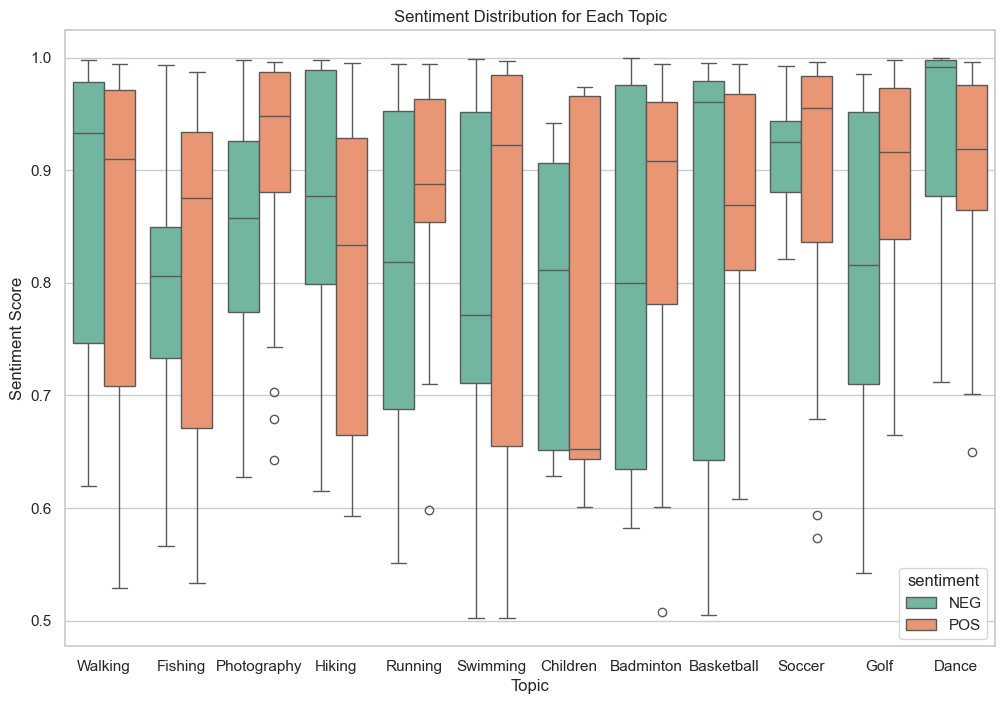

In [28]:
import seaborn as sns
# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot for each topic
plt.figure(figsize=(12, 8))
sns.boxplot(x='topic', y='sentimet-score', hue='sentiment', data=maindf, palette='Set2')

# Add title and labels
plt.title('Sentiment Distribution for Each Topic')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')

# Show the plot
plt.show()

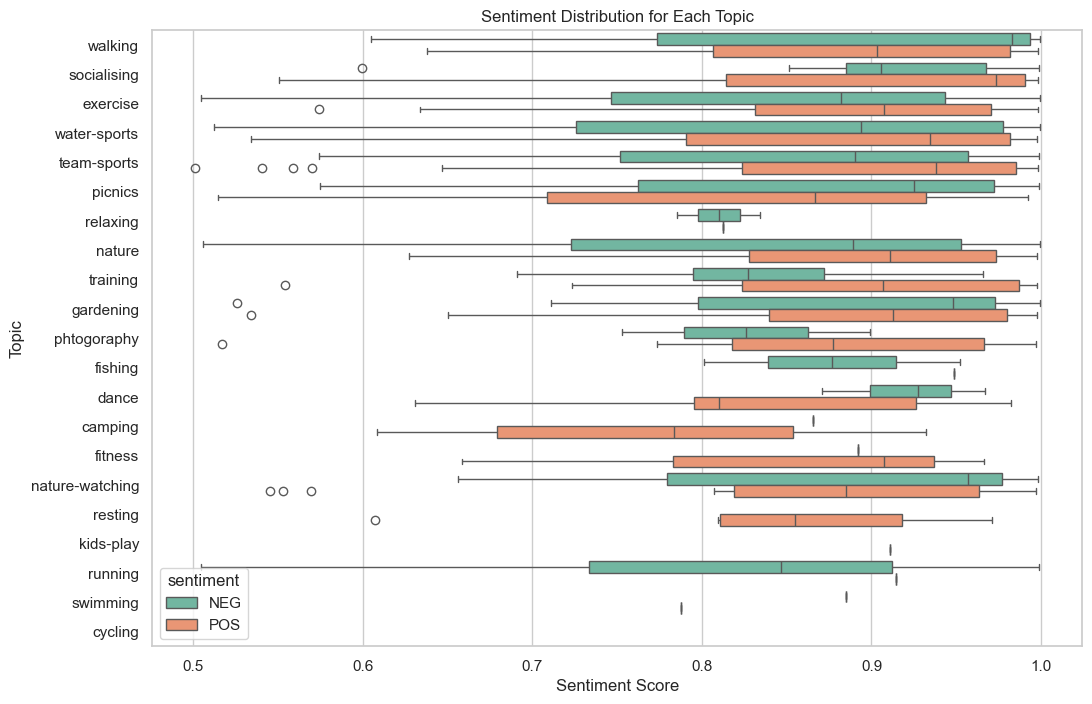

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your dataset is in a pandas DataFrame named df
# Example:
# df = pd.read_csv('your_dataset.csv')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a horizontal boxplot for each topic
plt.figure(figsize=(12, 8))
sns.boxplot(x='sentiment-score', y='topic', hue='sentiment', data=maindf, palette='Set2')

# Add title and labels
plt.title('Sentiment Distribution for Each Topic')
plt.xlabel('Sentiment Score')
plt.ylabel('Topic')

# Show the plot
plt.show()


In [10]:
pivot_table = maindf.pivot_table(index='topic', columns='sentiment', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table['POS'] + pivot_table['NEG']

In [11]:
pivot_table = maindf.pivot_table(index='topic', columns='sentiment', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table['POS'] + pivot_table['NEG']
print(pivot_table)

sentiment        NEG  POS  Total
topic                           
camping            5    3      8
cycling            0    1      1
dance              2    6      8
exercise          74  114    188
fishing            0    3      3
fitness            0    4      4
gardening         10   16     26
kids-play          1    0      1
nature            38   45     83
nature-watching   11   19     30
phtogoraphy        3    8     11
picnics           42   67    109
relaxing           1    2      3
resting            1    4      5
running            3    1      4
socialising       27   31     58
swimming           1    1      2
team-sports       93   95    188
training           5    9     14
walking           28   42     70
water-sports      55   72    127


In [63]:
# topic_cols = df.columns[1:]
numeric_df = df.drop(columns=['text'])


numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN

# Assuming you have already created 'Topic' column in df
df['Topic_name'] = np.where(numeric_df.eq(1).any(axis=1), numeric_df.idxmax(axis=1), 'None')

print(df)
df['Topic_name']

                                                  text  Walking  Fishing  \
0    Walk until you drop @ Garden Bay Bridge, Marin...        1        0   
1         Walking by the beach https://t.co/yXvYUHiVbE        1        0   
2    Afternoon walk 33Â°C, and entrance of the form...        1        0   
3    Be like the river. \n\nWalking by the Singapor...        1        0   
4    Nature walk Sunday at hort park https://t.co/m...        1        0   
..                                                 ...      ...      ...   
355  If you happen to be in Tampines, come lah! â¤...        0        0   
356  Dance like nobody is watching,\nLove like you'...        0        0   
357  Today I saw one of the strangest dance. Irish ...        0        0   
358  The most scientific dance practice I have ever...        0        0   
359  My feet hurts so so much I donâ€™t wanna dance...        0        0   

     Photography  Hiking  Children  Running  Badminton  Basketball  Soccer  \
0        

0      Walking
1      Walking
2      Walking
3      Walking
4      Walking
        ...   
355      Dance
356      Dance
357      Dance
358      Dance
359      Dance
Name: Topic_name, Length: 360, dtype: object

/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_47433/368112883.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot= sns.barplot(x=topic_counts.index, y=topic_counts.values, order=topics_g, palette="viridis")


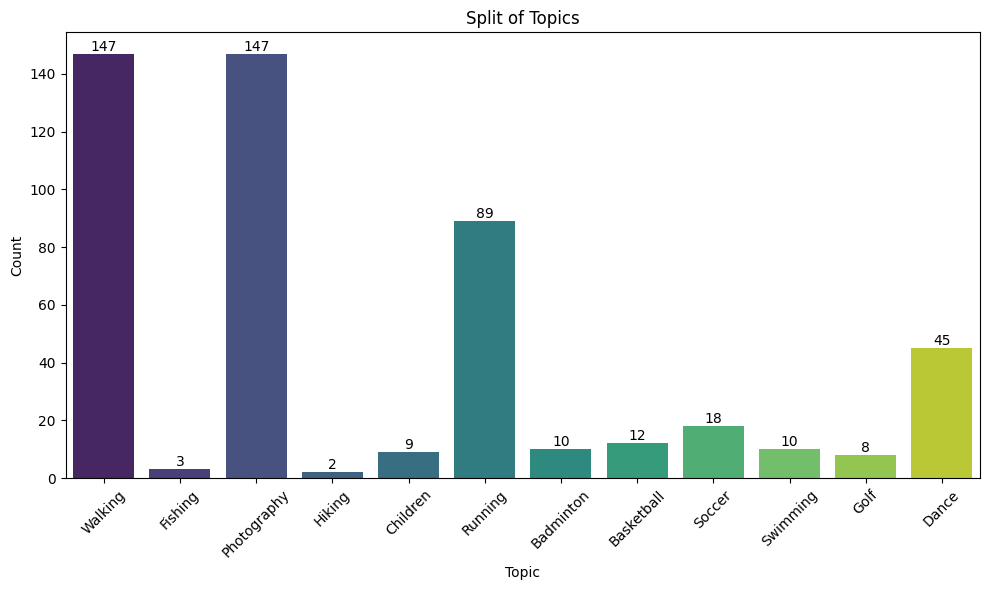

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# # Sample data
topics_g = ['Walking', 'Fishing', 'Photography', 'Hiking', 'Children', 
          'Running', 'Badminton', 'Basketball', 'Soccer', 'Swimming', 
          'Golf', 'Dance']

topic_country= pd.DataFrame({"topic": labels})
topic_counts = topic_country['topic'].value_counts()

topic_counts = topic_counts.reindex(topics_g, fill_value=0)


# Plot the bar graph
plt.figure(figsize=(10, 6))
barplot= sns.barplot(x=topic_counts.index, y=topic_counts.values, order=topics_g, palette="viridis")
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Split of Topics')
plt.xticks(rotation=45)

for index, value in enumerate(topic_counts.values):
    barplot.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

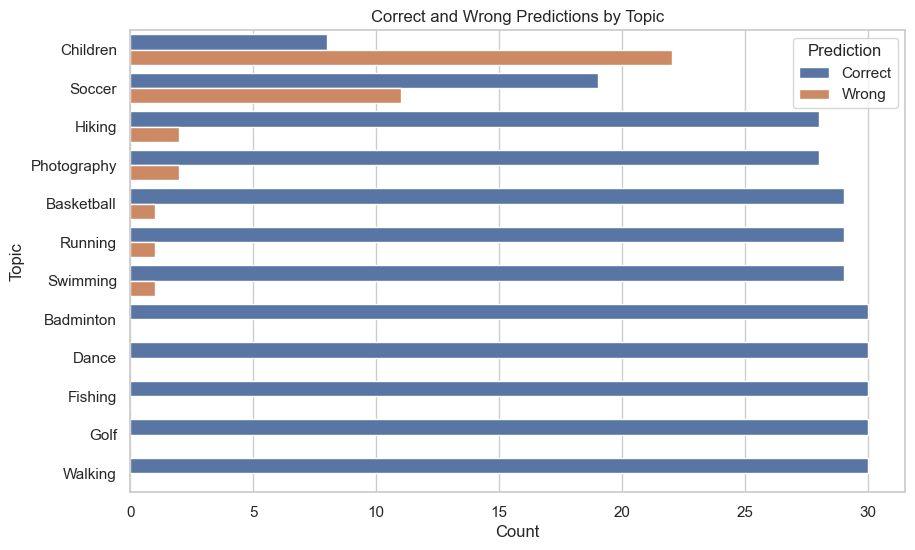

In [70]:
# rename Topic in df to topic
maindf.rename(columns={'Topic': 'topic'}, inplace=True)
topic_checkdf= maindf.join(df['Topic_name'])

topic_checkdf.head()



# Count correct and wrong predictions for each topic
topic_checkdf['Correct'] = np.where(topic_checkdf['topic'] == topic_checkdf['Topic_name'], 1, 0)
topic_checkdf['Wrong'] = np.where(topic_checkdf['topic'] != topic_checkdf['Topic_name'], 1, 0)
result = topic_checkdf.groupby('Topic_name').agg({'Correct': 'sum', 'Wrong': 'sum'}).reset_index()

# Calculate total predictions for each topic
result['Total'] = result['Correct'] + result['Wrong']

# Calculate proportion of correct predictions
result['Proportion_Correct'] = result['Correct'] / result['Total']

# Sort by proportion of correct predictions
result = result.sort_values(by='Proportion_Correct')

# Plotting
melted_df = result.melt(id_vars='Topic_name', value_vars=['Correct', 'Wrong'], var_name='Prediction', value_name='Count')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Topic_name', hue='Prediction', data=melted_df)
plt.xlabel('Count')
plt.ylabel('Topic')
plt.title('Correct and Wrong Predictions by Topic')
plt.show()
